__Análise Resultados de Docking do PLPro Sars-Cov-2 com Luteolin no Autodock Vina.__

Notebook de exemplo para análise das posições de docking com Autodock Vina. 

Dúvidas escrever para rafael.pleite@usp.br

Importa as bibliotecas necessárias para análise.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

Diretório com os arquivos de saída da simulação com o Vina.

Os arquivos txt precisam ser escritos da seguinte forma "algo,x_pos,y_pos,z_pos,.txt", exemplo "log,0,3,0,.txt". Onde pos é a posição do centro da caixa.

In [2]:
diretorio = 'C:\SARSCOV2\The Molecular Docking Study of Potential Drug Candidates\Luteolin\LuteolinPLpro\Teste\Resultado'

Lê cada arquivo .txt com os resultados e cria uma lista contendo cada um das posições do centro da caixa e a respectiva melhor energia de ligação.

In [3]:
posicoes = [[], [], [], []]
for root, directories, files in os.walk(diretorio, topdown=False):
    for nome in files:
        if nome.find('txt') != -1:
            f = open(str(diretorio)+ r'\b'[0]+str(nome),'r')
            dados = f.readlines()
            posicoes[0].append(nome.split(',')[1])
            posicoes[1].append(nome.split(',')[2])
            posicoes[2].append(nome.split(',')[3])
            posicoes[3].append(float(dados[26].split()[1]))

Cria um DataFrame com a lista criada acima.

In [4]:
df = pd.DataFrame(list(zip(posicoes[3],posicoes[0],posicoes[1],posicoes[2])), 
                      columns = ['energia (kcal/mol)', 'x_pos', 'y_pos', 'z_pos'])

Remove os valores de energia > 0.

In [5]:
df = df[df['energia (kcal/mol)'] <=0]

Apresenta alguns dados de menores energias.

In [6]:
df.sort_values(by=['energia (kcal/mol)']).head(10)

,energia (kcal/mol),x_pos,y_pos,z_pos
98,-8.9,60,23,20
57,-8.1,20,83,0
78,-8.0,40,43,20
108,-7.8,60,43,20
52,-7.6,20,63,0
97,-7.5,60,23,0
82,-7.5,40,63,0
77,-7.4,40,43,0
68,-7.3,40,23,20
109,-7.1,60,43,40


Informações sobre o DataFrame.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energia (kcal/mol)  150 non-null    float64
 1   x_pos               150 non-null    object 
 2   y_pos               150 non-null    object 
 3   z_pos               150 non-null    object 
dtypes: float64(1), object(3)
memory usage: 5.9+ KB


__Gráficos__

Fique avontade para alterar os parâmetros e ver o que acontece com os gráficos abaixo.

Cria Heatmaps xy, xz e yz para vizualização dos resultados.

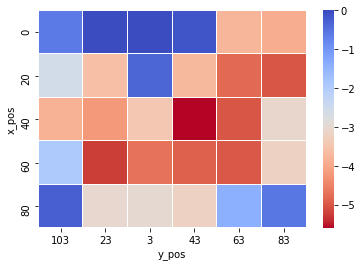

In [8]:
heat1 = df.pivot_table(index='x_pos', columns='y_pos', values='energia (kcal/mol)')
sns.heatmap(heat1, cmap='coolwarm_r', linewidths=0.05)

'Para salvar a figura:'
plt.savefig('Heatmap_xy.png', dpi=250)

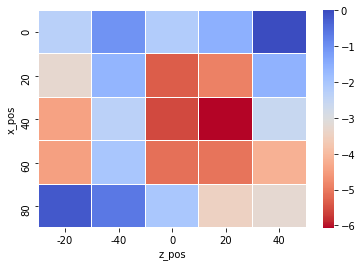

In [9]:
heat2 = df.pivot_table(index='x_pos', columns='z_pos', values='energia (kcal/mol)')
sns.heatmap(heat2, cmap='coolwarm_r', linewidths=0.05)

'Para salvar a figura:'
plt.savefig('Heatmap_xz.png', dpi=250)

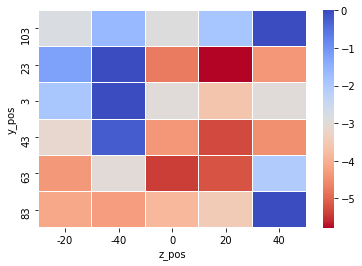

In [10]:
heat3 = df.pivot_table(index='y_pos', columns='z_pos', values='energia (kcal/mol)')
sns.heatmap(heat3, cmap='coolwarm_r', linewidths=0.05)

'Para salvar a figura:'
plt.savefig('Heatmap_yz.png', dpi=250)

Cria gráficos com os pontos do centro das caixa xy, xz, yz para vizualização dos resultados.

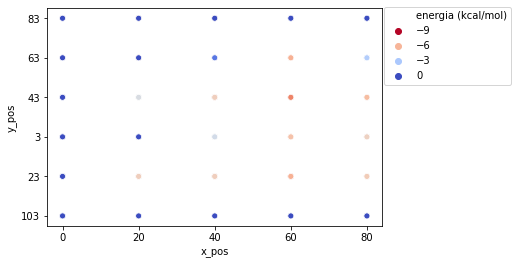

In [11]:
scatterxy = sns.scatterplot(data=df,x='x_pos', y='y_pos',hue='energia (kcal/mol)',palette='coolwarm_r')
lgd = plt.legend(bbox_to_anchor=(0.4, 0.625, 1., .102), loc='lower right')

'Para salvar a figura:'
plt.savefig('Scatter_xy.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi = 250)

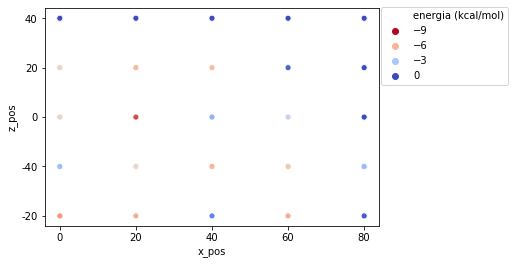

In [12]:
scatterxy = sns.scatterplot(data=df,x='x_pos', y='z_pos',hue='energia (kcal/mol)',palette='coolwarm_r')
lgd = plt.legend(bbox_to_anchor=(0.4, 0.625, 1., .102), loc='lower right')

'Para salvar a figura:'
plt.savefig('Scatter_xz.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi = 250)

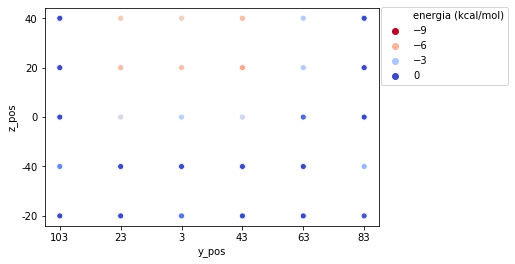

In [13]:
scatterxy = sns.scatterplot(data=df,x='y_pos', y='z_pos',hue='energia (kcal/mol)',palette='coolwarm_r')
lgd = plt.legend(bbox_to_anchor=(0.4, 0.625, 1., .102), loc='lower right')

'Para salvar a figura:'
plt.savefig('Scatter_yz.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi = 250)

Considero que esse notebook não é o melhor para analisar os dados de Docking, porém para quem está começando ele é uma ótima maneira de encontrar a melhor posição de ligação, pois é bastante intuitivo. Caso queira aproveitar o máximo que seu resultado de docking pode oferecer, ou seja, posições do centro de massa e RMSD e energia, existe outro notebook "???" que pode ajudar a realizar esta análise mais profunda.

In [14]:
!jupyter nbconvert  AnaliseMelhorDockCentrodaCaixa.ipynb --to html

[NbConvertApp] Converting notebook AnaliseMelhorDockCentrodaCaixa.ipynb to html
[NbConvertApp] Writing 371318 bytes to AnaliseMelhorDockCentrodaCaixa.html
